<a href="https://colab.research.google.com/github/jahanshukhy/Intro-to-Machine-Learning/blob/main/LinearRegressionProblem1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# developed a code that run linear regression with gradient descent algorithm for each of the explanatory variables in isolation
#considered X1 which is explaining Y

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import D3.csv from the Drive
file_path = '/content/drive/My Drive/ML/HW1/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


X =  [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525252 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454546 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.5050505  2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474748 3.51515151 3.55555556 3.5

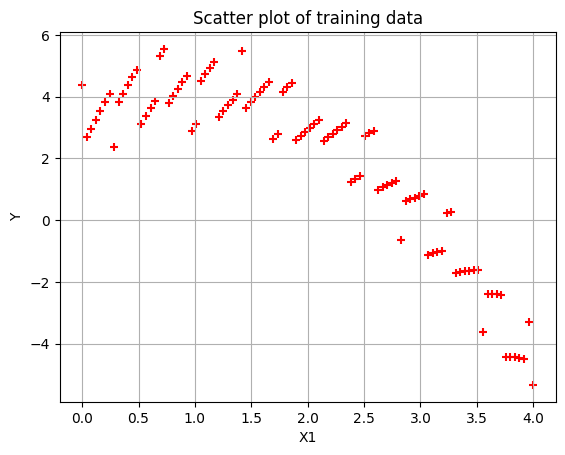

In [3]:
# Define explanatory varialbles, output, and the sample training numbers
X = sample.values[:, 0]  # explanatory variable from first column -- X1
y = sample.values[:, 3]  # output values from last column
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples

# Display all the data and the total number of training examples
print('X = ', X[: 100])
print('y = ', y[: 100])
print('m = ', m)
print('n = ', n)

# Scatter plot
plt.scatter(X, y, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [ ]:
X_0 = np.ones((m, 1)) #define X0 as column vector with value 1
X_0[:100]

In [ ]:
X_1 = X.reshape(m, 1) #Insert X1 value in column 2 to make the X matrix
X_1[:100]

In [ ]:
# Build X as a 2D array matrix with X0 and X1
X = np.hstack((X_0, X_1))
X[:100]

In [8]:
theta = np.zeros(2)
theta

array([0., 0.])

In [9]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta) #hypothesis function
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [10]:
# calculate the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [11]:
def gradient_descent(X, y, theta, alpha, iterations):

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [12]:
theta = [0., 0.]
iterations = 1500
alpha = 0.05

In [13]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.9279486  -2.03833651]
cost_history = [5.32852962 5.18676104 5.07204859 ... 0.98499308 0.98499308 0.98499308]


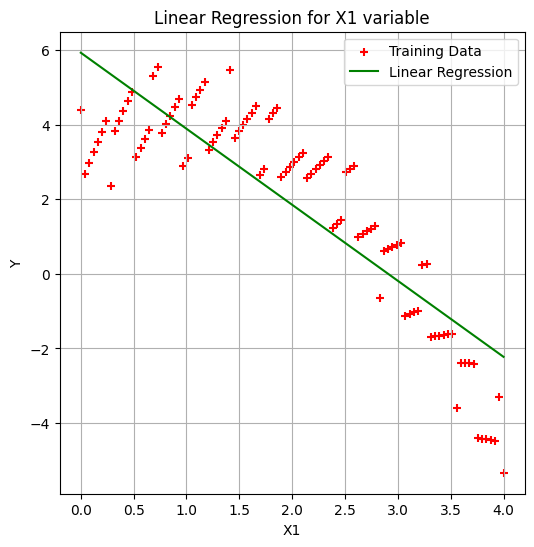

In [14]:
# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression for X1 variable')
plt.legend()

# Show the plot
plt.show()

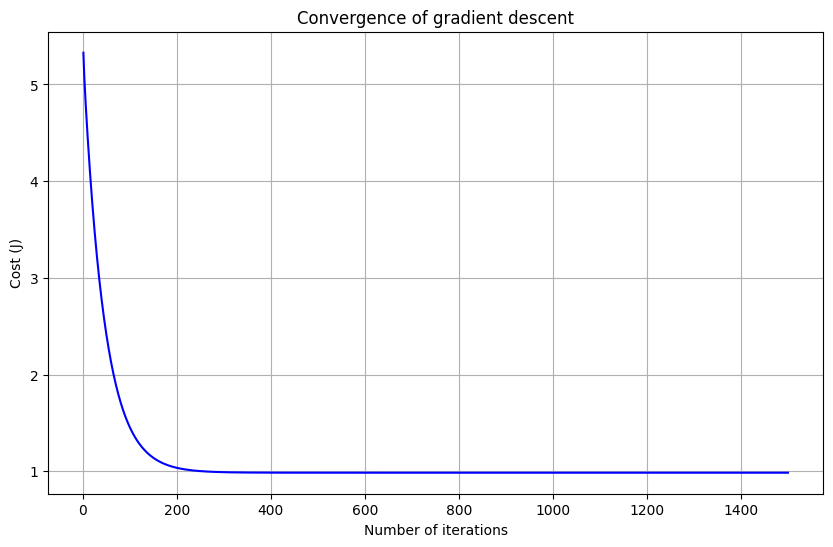

In [15]:
# plot cost vs iteration
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

plt.show()